In [62]:
class Neural_Network(object):
    def __init__(self):#, n_hidden, eta, epochs): 
        pass 
        
    @staticmethod
    def norm_matrix(matrix):

        matrix_transpose = list(zip(*matrix))

        matrix_empty = []
        for m in range(len(matrix_transpose)):
            normed_row = [abs(list(zip(*matrix))[m][x])/max(list(zip(*matrix))[m]) for x in range(len(list(zip(*matrix))[m]))]
            matrix_empty.append(normed_row)

        normed_matrix = list(zip(*matrix_empty))

        return normed_matrix
        
    
    @staticmethod
    def random_number():
        import datetime    
        my_dt_ob = datetime.datetime.now()
        date_list = [my_dt_ob.year, my_dt_ob.month, my_dt_ob.day, my_dt_ob.hour, my_dt_ob.minute, my_dt_ob.second, my_dt_ob.microsecond]     
        dt_random_num = date_list[6]**(1/(date_list[5]+0.0001))*date_list[4]
        return dt_random_num  
    
    @staticmethod
    def random_list_generator(list_len):
        my_random_list = []
        for i in range(list_len):
            my_random_list_i = (i+1)*(Neural_Network.random_number()*(i+1)-i*2)
            my_random_list.append(my_random_list_i-round(my_random_list_i))
        return my_random_list
   
    @staticmethod
    def random_matrix_generator(rows_len, cols_len):
        my_random_chain = Neural_Network.random_list_generator(rows_len * cols_len)   
        nev = [my_random_chain[i:i+cols_len] for i in range(0,len(my_random_chain), cols_len)]
        return nev
    
    '''@staticmethod
    def ReLu(z):
        return z if z>0 else 0
    
    @staticmethod
    def ReLu_prime(z):
        return 1 if z>=0 else 0'''

    @staticmethod
    def sigmoid(z):
        from math import exp
        # exp = 2.71828182845904523536028747135266249775724709369995
        try:
          res = 1/(1+exp(-z))
        except OverflowError:
          res = 0#float('inf')
        return res
    
    @staticmethod
    def sigmoid_prime(z):
        from math import exp
        # exp = 2.71828182845904523536028747135266249775724709369995
        try:
          res = exp(-z)/((1+exp(-z))**2)
        except OverflowError:
          res = 0#float('inf')
        return res
        # return exp(-z)/((1+exp(-z))**2)

    @staticmethod
    def matrix_multiple(a, b):
        zip_b = zip(*b)
        zip_b = list(zip_b)
        return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b)) 
                 for col_b in zip_b] for row_a in a]
    
    @staticmethod
    def matrix_diff(matrix1, matrix2):   
        empty_chain = [None]*len(matrix1)*len(matrix1[0])
        matrix_diff = [empty_chain[i:i+len(matrix1[0])] for i in range(0, len(empty_chain), len(matrix1[0]))]
        for ii in range(len(matrix1)):
            for jj in range(len(matrix1[0])):
                matrix_diff[ii][jj] = matrix1[ii][jj] - matrix2[ii][jj]
        return matrix_diff
    
    @staticmethod
    def num_matrix(n, matrix):
        return [list(map(lambda x: x*n, z)) for z in matrix]
    
    @staticmethod
    def initial_weights_matrix_generator(matrix_X, matrix_Y, n_hidden):
        w_rows_list = [len(matrix_X[0])] + n_hidden
        w_cols_list = n_hidden +[len(matrix_Y[0])]
        w_dim_list = list(zip(w_rows_list, w_cols_list))
        initial_weights_matrix_list = []
        for iw in range(len(w_dim_list)):
            W_i = Neural_Network.random_matrix_generator(w_dim_list[iw][0], w_dim_list[iw][1])
            initial_weights_matrix_list.append(W_i)
        return initial_weights_matrix_list
      
    @staticmethod
    def z_a_list_func(X_, n_hidden, weights):
        z_initial = Neural_Network.matrix_multiple(X_, weights[0])
        a_initial =  [*zip(*[[Neural_Network.sigmoid(z_initial[i][j]) for i in range(len(z_initial))] for j in range(len(z_initial[0]))])]

        z_list = []
        z_list.append(z_initial)

        a_list = []
        a_list.append(a_initial)

        for g in range(len(n_hidden)):
            z_g = Neural_Network.matrix_multiple(a_list[g], weights[g+1])
            z_list.append(z_g)
            a_g = [*zip(*[[Neural_Network.sigmoid(z_list[g+1][a][b]) for a in range(len(z_list[g+1]))] for b in range(len(z_list[g+1][0]))])]
            a_list.append(a_g)
        return z_list, a_list
    
    @staticmethod    
    def prime(n_hidden, z_list_):
        prime_list = []
        for p in range(len(n_hidden)+1):
            prime_list_p = [*zip(*[[Neural_Network.sigmoid_prime(z_list_[p][i][j]) for i in range(len(z_list_[p]))] for j in range(len(z_list_[p][0]))])]
            prime_list.append(prime_list_p)
        return prime_list
    
    @staticmethod    
    def discrepansy(Y_, a_list_):
        discrepansy_list = []
        for yy in range(len(Y)):
            dis_i = Y_[yy][0] - a_list_[-1][yy][0] #Neural_Network.matrix_diff(Y[yy], a_list_[-1][yy])  #
            discrepansy_list.append(dis_i)
        discrepansy_list = [discrepansy_list[i:i+len(Y_[0])] for i in range(0,len(Y_), len(Y_[0]))]
        return discrepansy_list
    
    @staticmethod    
    def delta(Y_delta, weights_delta, discrepansy_, prime_):
        delta_last = [[discrepansy_[qi][0]*prime_[-1][qi][0] for qi in range(len(Y_delta))][iq:iq+len(Y_delta[0])] for iq in range(0,len(Y_delta), len(Y_delta[0]))] 
        delta_list = []
        delta_list.append(delta_last)
        for d in range(len(n_hidden)):
            delta_i = Neural_Network.matrix_multiple(delta_list[0], Neural_Network.matrix_multiple([*zip(*weights_delta[-d-1])], prime_[-d-2]))
            delta_list.insert(0, delta_i)
        return delta_list
    
    @staticmethod    
    def dEdW(X_de, n_hidden, a_list_, delta_):
        dEdW_list = []
        corr_list = [X_de]+a_list_[0:len(a_list_)-1]
        for e in range(len(n_hidden)+1):
            dEdW_e = Neural_Network.matrix_multiple([*zip(*corr_list[e])], delta_[e])
            dEdW_list.append(dEdW_e)
        return dEdW_list
    
    @staticmethod    
    def weights_update(eta, weights_u, dEdW_f):
        w_updated_matrix = []
        for n in range(len(n_hidden)+1):
            w_updated_n = Neural_Network.matrix_diff(weights_u[n], Neural_Network.num_matrix(-eta, dEdW_f[n]))
            w_updated_matrix.append(w_updated_n)
        return  w_updated_matrix
    
    @staticmethod
    def calculus(X_c, Y_c, n_hidden, epochs, eta):
        
        X_normed = Neural_Network.norm_matrix(X_c)
        Y_normed = Neural_Network.norm_matrix(Y_c)
        #X_normed = X
        #Y_normed = Y
        
        w_list_total = []
        a_list_total= []
        z_list_total= []
        prime_list_total = []
        discrepansy_list_total = []
        delta_list_total = []
        dEdW_list_total = []

        #База индукции
        w_0 = Neural_Network.initial_weights_matrix_generator(X_normed, Y_normed, n_hidden)
        z_0, a_0 = Neural_Network.z_a_list_func(X_normed, n_hidden, w_0)
        p_0 = Neural_Network.prime(n_hidden, z_0)
        dis_0 = Neural_Network.discrepansy(Y_normed, a_0)
        del_0 = Neural_Network.delta(Y_normed, w_0, dis_0, p_0)
        dEdW_0 = Neural_Network.dEdW(X_normed, n_hidden, a_0, del_0)


        w_list_total.append(w_0)
        a_list_total.append(a_0)
        z_list_total.append(z_0)
        prime_list_total.append(p_0)
        discrepansy_list_total.append(dis_0)
        delta_list_total.append(del_0)
        dEdW_list_total.append(dEdW_0)

        for epoch in range(epochs):

            z_a_list_epoch = Neural_Network.z_a_list_func(X_normed, n_hidden, w_list_total[epoch])
            a_list_total.append(z_a_list_epoch[0])
            z_list_total.append(z_a_list_epoch[1])

            prime_epoch = Neural_Network.prime(n_hidden, z_list_total[epoch])
            prime_list_total.append(prime_epoch)

            discrepansy_epoch = Neural_Network.discrepansy(Y_normed, a_list_total[epoch])
            discrepansy_list_total.append(discrepansy_epoch)

            delta_epoch = Neural_Network.delta(Y_normed, w_list_total[epoch], discrepansy_list_total[epoch], prime_list_total[epoch])
            delta_list_total.append(delta_epoch)

            dEdW_epoch = Neural_Network.dEdW(X_normed, n_hidden, a_list_total[epoch], delta_list_total[epoch])
            dEdW_list_total.append(dEdW_epoch)

            w_epoch = Neural_Network.weights_update(-eta, w_list_total[epoch], dEdW_list_total[epoch])
            w_list_total.append(w_epoch)

        return a_list_total, z_list_total, prime_list_total, discrepansy_list_total, delta_list_total, dEdW_list_total, w_list_total
    

In [2]:
X, Y = Neural_Network.random_matrix_generator(150, 7), Neural_Network.random_matrix_generator(150,1)

In [3]:
n_hidden = [100, 50, 10]
epochs = 400
eta = 0.0045

In [4]:
%%time
NN_dis = Neural_Network.calculus(X, Y, n_hidden, epochs, eta)[3]

CPU times: total: 2min 17s
Wall time: 2min 17s


In [5]:
def MSE(NN_discrepansy):
    loss_list = []
    for loss in range(len(NN_discrepansy)):
        loss_epoch = 0.5*sum([(NN_discrepansy[loss][i][0])**2 for i in range(len(NN_discrepansy[loss]))])
        loss_list.append(loss_epoch)
    return loss_list

In [6]:
MSE_list = MSE(NN_dis)

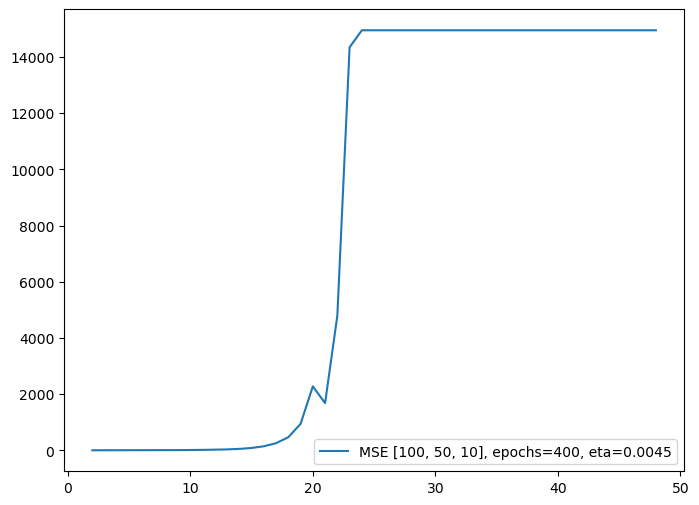

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(2, len(MSE(NN_dis))), MSE_list[2:len(MSE_list)], label=f'MSE {n_hidden}, epochs={epochs}, eta={eta}')
plt.legend()
plt.show()

# Другие функции активации

Функция для построения графиков:

In [28]:
def func_plot(range_, act_fun):
    range_ = range_
    list_ = []
    for r in range(len(range_ )):
        point = act_fun(range_[r])
        list_.append(point)
    return list_

## ReLu 

$$f(x) = x^+ = \max(0, x) = \frac{x+|x|}{2} = \begin{cases}
    x & \text{if } x > 0, \\
    0 & \text{otherwise}.
\end{cases}\\
f'(x) = \begin{cases}
    1 & \text{if } x > 0, \\
    0 & \text{if } x < 0.
\end{cases}$$

In [12]:
def ReLu(z):
    return z if z>0 else 0

In [30]:
def ReLu_prime(z):
    return 1 if z>=0 else 0

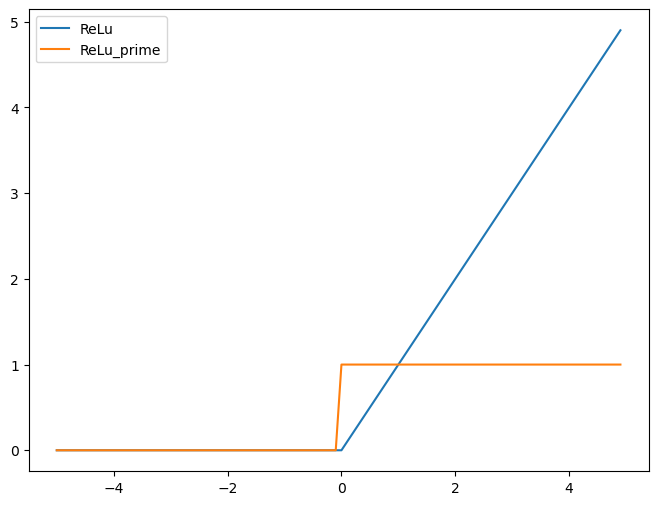

In [31]:
z = list(i/10 for i in range(-50,50))
r_list = []
r1_list = []
for k in range(len(z)):
    r = ReLu(z[k])
    r1 = ReLu_prime(z[k])
    r_list.append(r)
    r1_list.append(r1)
plt.figure(figsize=(8,6))
plt.plot(z, r_list , label=f'ReLu')
plt.plot(z, r1_list , label=f'ReLu_prime')
plt.legend()
plt.show()

## Гиперболический тангенс

$$f(x)=\operatorname{th}x=\frac{\operatorname{sh}x}{\operatorname{ch}x} = \frac {e^x - e^{-x}} {e^x + e^{-x}} = \frac{e^{2x} - 1} {e^{2x} + 1}=1-\frac {2} {e^{2x} + 1}$$

$$ f'(x)=1-\frac{4e^{2x}}{\left(e^{2x}+1\right)^2}$$

In [25]:
def tanh(z):
    from math import exp
    #exp = 2.71828182845904523536028747135266249775724709369995  
    return 1-2/(1+exp(2*z))

In [26]:
def tanh_prime(z):
    from math import exp
    #exp = 2.71828182845904523536028747135266249775724709369995  
    return 1-4*exp(2*z)/(1+exp(2*z))**2

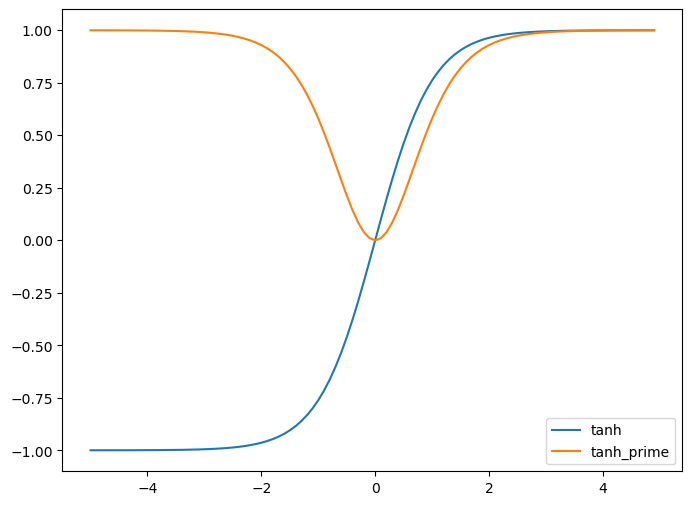

In [27]:
z = list(i/10 for i in range(-50,50))
r_list = []
r1_list = []
for k in range(len(z)):
    r = tanh(z[k])
    r1 = tanh_prime(z[k])
    r_list.append(r)
    r1_list.append(r1)
plt.figure(figsize=(8,6))
plt.plot(z, r_list , label=f'tanh')
plt.plot(z, r1_list , label=f'tanh_prime')
plt.legend()
plt.show()


## Протестируем нашу нейронную сеть на датасете по деградации солнечных батарей

In [4]:
import pandas as pd
import numpy as np
data_SB = pd.read_excel('dataset 1.xlsx')
data_SB

,Дата,Протоны >1 MeV,Протоны >10 MeV,Протоны >100 MeV,Электроны >0.6 MeV,Электроны >2 MeV,I БС3 отн.,I БС4 отн.,Uхх БС3 отн.,Uхх БС4 отн.,К осв-ти
0,2000-03-12,130000,11000,2400,3700000000,8500000,1.000000,1.000000,1.000000,1.000000,1.011060
1,2000-03-13,41000,11000,2400,6500000000,4000000,0.987450,1.000000,1.005470,0.989170,1.010967
2,2000-04-26,130000,13000,2600,540000000,320000,0.894980,0.933836,1.000547,0.992783,0.960554
3,2000-05-03,240000,10000,2100,15000000000,31000000,0.882705,0.914330,1.004103,0.991878,0.947413
4,2000-05-25,610000,9900,2000,14000000000,32000000,0.888710,0.914330,1.005470,1.000000,0.910599
...,...,...,...,...,...,...,...,...,...,...,...
143,2000-12-25,89000,8600,1900,1700000000,550000,0.851793,0.914330,0.911820,0.896530,0.948990
144,2000-12-26,54000,9800,1900,780000000,210000,0.847610,0.914330,0.900870,0.891120,0.949276
145,2000-12-27,100000,9400,1900,1800000000,430000,0.846920,0.918460,0.906350,0.896530,0.949606
146,2000-12-30,170000,29000,2300,3100000000,750000,0.855977,0.914330,0.909085,0.894730,0.950923


Переведём датасет в список списков

In [5]:
col_list_SB = list(data_SB.columns)
col_list_SB

['Дата',
 'Протоны >1 MeV',
 'Протоны >10 MeV',
 'Протоны >100 MeV',
 'Электроны >0.6 MeV',
 'Электроны >2 MeV',
 'I БС3 отн.',
 'I БС4 отн.',
 'Uхх БС3 отн.',
 'Uхх БС4 отн.',
 'К осв-ти']

In [6]:
lists = []
for k in np.arange(len(col_list_SB)):
    list_k = list(data_SB[f'{col_list_SB[k]}'])
    lists.append(list_k)

In [7]:
X, Y = list(zip(*lists[1:len(lists)-1])), [[lists[-1][i]] for i in range(len(lists[-1]))]

In [63]:
n_hidden = [20, 5, 2]
epochs = 500
eta = 0.003

In [64]:
%%time
NN_dis_SB = Neural_Network.calculus(X, Y, n_hidden, epochs, eta)[3]

CPU times: total: 14.2 s
Wall time: 14.3 s


In [66]:
def MSE(NN_discrepansy):
    loss_list = []
    for loss in range(len(NN_discrepansy)):
        loss_epoch = 0.5*sum([(NN_discrepansy[loss][i][0])**2 for i in range(len(NN_discrepansy[loss]))])
        loss_list.append(loss_epoch)
    return loss_list

MSE_list_SB = MSE(NN_dis_SB)

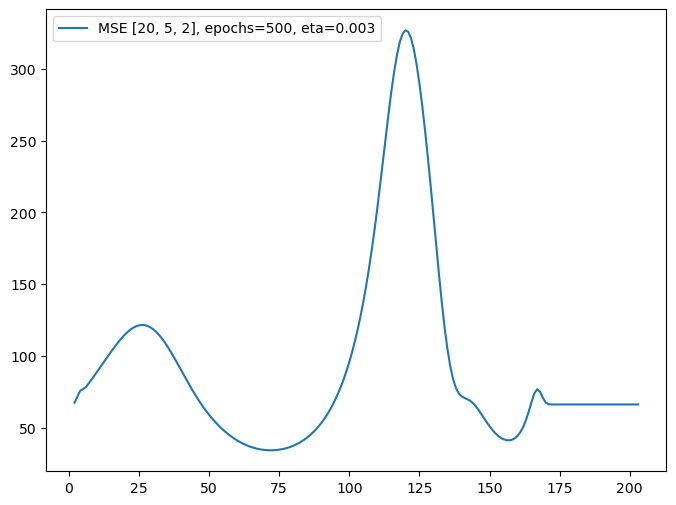

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(2, len(MSE_list_SB)), MSE_list_SB[2:len(MSE_list_SB)], label=f'MSE {n_hidden}, epochs={epochs}, eta={eta}')
plt.legend()
plt.show()

## Проверим результат с помощью библиотеки tensorflow.python.keras

In [33]:
import pandas as pd
import numpy as np
from keras.models import Sequential
import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from keras.layers.core import Dense
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import History 


def execute_method(data, n_hidden_, epochs_, eta_):
    
    col_list = list(data.columns)
    lists = []
    for k in np.arange(len(data.columns)):
        list_k = list(data[f'{col_list[k]}'])
        lists.append(list_k)
    
    X_train, y_train = list(zip(*lists[1:len(lists)-1])), [[lists[-1][i]] for i in range(len(lists[-1]))]


    #ЗАДАЕМ ПОСЛЕДОВАТЕЛЬНОСТЬ СЛОЕВ
    model = tf.keras.Sequential()
    
    for layer in np.arange(len(n_hidden_)):
        model.add(tf.keras.layers.Dense(n_hidden_[layer]))
        model.add(tf.keras.layers.Activation('sigmoid'))

    model.compile(loss='mse', optimizer='sgd')
    
    model.compile(loss=keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"),
                  optimizer=keras.optimizers.SGD(lr=eta_))

    fitting = model.fit(X_train, y_train, epochs = epochs_)
    
    hist_ = fitting.history
    
    return hist_ 


In [37]:
n_hidden = [100, 50, 20]
epochs = 400
eta = 0.001

In [38]:
loss_keras_SB = execute_method(data_SB, n_hidden, epochs, eta)

Epoch 1/400


C:\Users\ivan\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5/5 [==============================] - 0s 5ms/step - loss: 0.2670
Epoch 2/400
5/5 [==============================] - 0s 5ms/step - loss: 0.2668
Epoch 3/400
5/5 [==============================] - 0s 5ms/step - loss: 0.2665
Epoch 4/400
5/5 [==============================] - 0s 5ms/step - loss: 0.2663
Epoch 5/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2660
Epoch 6/400
5/5 [==============================] - 0s 5ms/step - loss: 0.2658
Epoch 7/400
5/5 [==============================] - 0s 6ms/step - loss: 0.2655
Epoch 8/400
5/5 [==============================] - 0s 5ms/step - loss: 0.2653
Epoch 9/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2650
Epoch 10/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2647
Epoch 11/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2645
Epoch 12/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2642
Epoch 13/400
5/5 [==============================] - 0s 4ms/step - loss: 0

5/5 [==============================] - 0s 5ms/step - loss: 0.2191
Epoch 207/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2189
Epoch 208/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2186
Epoch 209/400
5/5 [==============================] - 0s 5ms/step - loss: 0.2184
Epoch 210/400
5/5 [==============================] - 0s 5ms/step - loss: 0.2182
Epoch 211/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2180
Epoch 212/400
5/5 [==============================] - 0s 5ms/step - loss: 0.2178
Epoch 213/400
5/5 [==============================] - 0s 5ms/step - loss: 0.2176
Epoch 214/400
5/5 [==============================] - 0s 5ms/step - loss: 0.2174
Epoch 215/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2172
Epoch 216/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2169
Epoch 217/400
5/5 [==============================] - 0s 4ms/step - loss: 0.2167
Epoch 218/400
5/5 [==============================] - 0

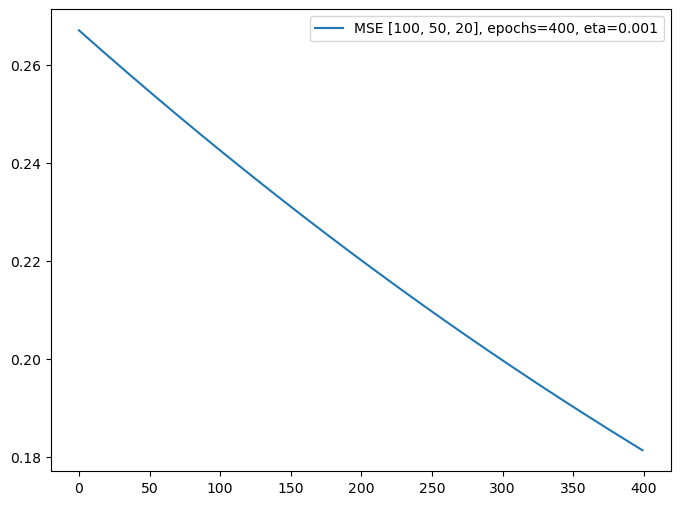

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(len(loss_keras_SB['loss'])), loss_keras_SB['loss'] , label=f'MSE {n_hidden}, epochs={epochs}, eta={eta}')
plt.legend()
plt.show()

## Создание мини-батча из матрицы

In [81]:
X[7]

(170000,
 13000,
 3000,
 12000000000,
 38000000,
 0.8930666666666668,
 0.89009,
 1.00547,
 1.0)

In [79]:
index_list = [int(abs(Neural_Network.random_list_generator(5)[q])*len(X)) for q in range(5)]
index_list

[47, 40, 19, 14, 4]

In [82]:
batch = []
for ind in range(len(index_list)):
    batch_row = X[index_list[ind]]
    batch.append(batch_row)

In [84]:
def get_batch(matrix, batch_size):
    index_list = [int(abs(Neural_Network.random_list_generator(batch_size)[q])*len(matrix)) for q in range(batch_size)]
    batch = []
    for ind in range(len(index_list)):
        batch_row = matrix[index_list[ind]]
        batch.append(batch_row)
    return batch

Добавим такую функцию в класс:

In [3]:
class Neural_Network(object):
    def __init__(self):#, n_hidden, eta, epochs): 
        pass 
        
    @staticmethod
    def norm_matrix(matrix):

        matrix_transpose = list(zip(*matrix))

        matrix_empty = []
        for m in range(len(matrix_transpose)):
            normed_row = [abs(list(zip(*matrix))[m][x])/max(list(zip(*matrix))[m]) for x in range(len(list(zip(*matrix))[m]))]
            matrix_empty.append(normed_row)

        normed_matrix = list(zip(*matrix_empty))

        return normed_matrix
        
    
    @staticmethod
    def random_number():
        import datetime    
        my_dt_ob = datetime.datetime.now()
        date_list = [my_dt_ob.year, my_dt_ob.month, my_dt_ob.day, my_dt_ob.hour, my_dt_ob.minute, my_dt_ob.second, my_dt_ob.microsecond]     
        dt_random_num = date_list[6]**(1/(date_list[5]+0.0001))*date_list[4]
        return dt_random_num  
    
    @staticmethod
    def random_list_generator(list_len):
        my_random_list = []
        for i in range(list_len):
            my_random_list_i = (i+1)*(Neural_Network.random_number()*(i+1)-i*2)
            my_random_list.append(my_random_list_i-round(my_random_list_i))
        return my_random_list
   
    @staticmethod
    def random_matrix_generator(rows_len, cols_len):
        my_random_chain = Neural_Network.random_list_generator(rows_len * cols_len)   
        nev = [my_random_chain[i:i+cols_len] for i in range(0,len(my_random_chain), cols_len)]
        return nev
    
    '''@staticmethod
    def ReLu(z):
        return z if z>0 else 0
    
    @staticmethod
    def ReLu_prime(z):
        return 1 if z>=0 else 0'''

    @staticmethod
    def sigmoid(z):
        from math import exp
        # exp = 2.71828182845904523536028747135266249775724709369995
        try:
          res =  1. / (1. + exp(-z))#1/(1+exp(-z))
        except OverflowError:
          res = float('inf')
        return res
    
    @staticmethod
    def sigmoid_prime(z):
        from math import exp
        # exp = 2.71828182845904523536028747135266249775724709369995
        try:
          res =  exp(-z) / (1. + exp(-z))**2 #exp(-z)/((1+exp(-z))**2)
        except OverflowError:
          res = float('inf')
        return res
        # return exp(-z)/((1+exp(-z))**2)

    @staticmethod
    def matrix_multiple(a, b):
        zip_b = zip(*b)
        zip_b = list(zip_b)
        return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b)) 
                 for col_b in zip_b] for row_a in a]
    
    @staticmethod
    def matrix_diff(matrix1, matrix2):   
        empty_chain = [None]*len(matrix1)*len(matrix1[0])
        matrix_diff = [empty_chain[i:i+len(matrix1[0])] for i in range(0, len(empty_chain), len(matrix1[0]))]
        for ii in range(len(matrix1)):
            for jj in range(len(matrix1[0])):
                matrix_diff[ii][jj] = matrix1[ii][jj] - matrix2[ii][jj]
        return matrix_diff
    
    @staticmethod
    def num_matrix(n, matrix):
        return [list(map(lambda x: x*n, z)) for z in matrix]
    
    @staticmethod
    def get_batch(matrix_X, matrix_Y, batch_size):
        index_list = [int(abs(Neural_Network.random_list_generator(batch_size)[q])*len(matrix_X)) for q in range(batch_size)]
        batch_X, batch_Y = [], []
        for ind in range(len(index_list)):
            batch_X_row = matrix_X[index_list[ind]]
            batch_X.append(batch_X_row)
            batch_Y_row = matrix_Y[index_list[ind]]
            batch_Y.append(batch_Y_row)
        return batch_X, batch_Y
    
    @staticmethod
    def initial_weights_matrix_generator(matrix_X, matrix_Y, n_hidden):
        w_rows_list = [len(matrix_X[0])] + n_hidden
        w_cols_list = n_hidden +[len(matrix_Y[0])]
        w_dim_list = list(zip(w_rows_list, w_cols_list))
        initial_weights_matrix_list = []
        for iw in range(len(w_dim_list)):
            W_i = Neural_Network.random_matrix_generator(w_dim_list[iw][0], w_dim_list[iw][1])
            initial_weights_matrix_list.append(W_i)
        return initial_weights_matrix_list
      
    @staticmethod
    def z_a_list_func(X_, n_hidden, weights):
        z_initial = Neural_Network.matrix_multiple(X_, weights[0])
        a_initial =  [*zip(*[[Neural_Network.sigmoid(z_initial[i][j]) for i in range(len(z_initial))] for j in range(len(z_initial[0]))])]

        z_list = []
        z_list.append(z_initial)

        a_list = []
        a_list.append(a_initial)

        for g in range(len(n_hidden)):
            z_g = Neural_Network.matrix_multiple(a_list[g], weights[g+1])
            z_list.append(z_g)
            a_g = [*zip(*[[Neural_Network.sigmoid(z_list[g+1][a][b]) for a in range(len(z_list[g+1]))] for b in range(len(z_list[g+1][0]))])]
            a_list.append(a_g)
        return z_list, a_list
    
    @staticmethod    
    def prime(n_hidden, z_list_):
        prime_list = []
        for p in range(len(n_hidden)+1):
            prime_list_p = [*zip(*[[Neural_Network.sigmoid_prime(z_list_[p][i][j]) for i in range(len(z_list_[p]))] for j in range(len(z_list_[p][0]))])]
            prime_list.append(prime_list_p)
        return prime_list
    
    @staticmethod    
    def discrepansy(Y_, a_list_):
        discrepansy_list = []
        for yy in range(len(Y_)):
            dis_i = Y_[yy][0] - a_list_[-1][yy][0] #Neural_Network.matrix_diff(Y[yy], a_list_[-1][yy])  #
            discrepansy_list.append(dis_i)
        discrepansy_list = [discrepansy_list[i:i+len(Y_[0])] for i in range(0,len(Y_), len(Y_[0]))]
        return discrepansy_list
    
    @staticmethod    
    def delta(Y_delta, weights_delta, discrepansy_, prime_):
        delta_last = [[discrepansy_[qi][0]*prime_[-1][qi][0] for qi in range(len(Y_delta))][iq:iq+len(Y_delta[0])] for iq in range(0,len(Y_delta), len(Y_delta[0]))] 
        delta_list = []
        delta_list.append(delta_last)
        for d in range(len(n_hidden)):
            delta_i = Neural_Network.matrix_multiple(delta_list[0], Neural_Network.matrix_multiple([*zip(*weights_delta[-d-1])], prime_[-d-2]))
            delta_list.insert(0, delta_i)
        return delta_list
    
    @staticmethod    
    def dEdW(X_de, n_hidden, a_list_, delta_):
        dEdW_list = []
        corr_list = [X_de]+a_list_[0:len(a_list_)-1]
        for e in range(len(n_hidden)+1):
            dEdW_e = Neural_Network.matrix_multiple([*zip(*corr_list[e])], delta_[e])
            dEdW_list.append(dEdW_e)
        return dEdW_list
    
    @staticmethod    
    def weights_update(eta, weights_u, dEdW_f):
        w_updated_matrix = []
        for n in range(len(n_hidden)+1):
            w_updated_n = Neural_Network.matrix_diff(weights_u[n], Neural_Network.num_matrix(-eta, dEdW_f[n]))
            w_updated_matrix.append(w_updated_n)
        return  w_updated_matrix
    
    @staticmethod
    def SGD(X_c, Y_c, batch_size_, n_hidden, epochs, eta):
        
        X_normed = Neural_Network.norm_matrix(X_c)
        Y_normed = Neural_Network.norm_matrix(Y_c)
        
        X_initial_batch, Y_initial_batch = Neural_Network.get_batch(X_normed, Y_normed, batch_size_)
        #Y_normed = Y
        
        w_list_total = []
        a_list_total= []
        z_list_total= []
        prime_list_total = []
        discrepansy_list_total = []
        delta_list_total = []
        dEdW_list_total = []

        #База индукции
        w_0 = Neural_Network.initial_weights_matrix_generator(X_initial_batch, Y_initial_batch, n_hidden)
        z_0, a_0 = Neural_Network.z_a_list_func(X_initial_batch, n_hidden, w_0)
        p_0 = Neural_Network.prime(n_hidden, z_0)
        dis_0 = Neural_Network.discrepansy(Y_initial_batch, a_0)
        del_0 = Neural_Network.delta(Y_initial_batch, w_0, dis_0, p_0)
        dEdW_0 = Neural_Network.dEdW(X_initial_batch, n_hidden, a_0, del_0)


        w_list_total.append(w_0)
        a_list_total.append(a_0)
        z_list_total.append(z_0)
        prime_list_total.append(p_0)
        discrepansy_list_total.append(dis_0)
        delta_list_total.append(del_0)
        dEdW_list_total.append(dEdW_0)

        for epoch in range(epochs):
            
            X_epoch_batch, Y_epoch_batch = Neural_Network.get_batch(X_normed, Y_normed, batch_size_)
            
            z_a_list_epoch = Neural_Network.z_a_list_func(X_epoch_batch, n_hidden, w_list_total[epoch])
            a_list_total.append(z_a_list_epoch[1])
            z_list_total.append(z_a_list_epoch[0])

            prime_epoch = Neural_Network.prime(n_hidden, z_list_total[epoch])
            prime_list_total.append(prime_epoch)

            discrepansy_epoch = Neural_Network.discrepansy(Y_epoch_batch, a_list_total[epoch])
            discrepansy_list_total.append(discrepansy_epoch)

            delta_epoch = Neural_Network.delta(Y_epoch_batch, w_list_total[epoch], discrepansy_list_total[epoch], prime_list_total[epoch])
            delta_list_total.append(delta_epoch)

            dEdW_epoch = Neural_Network.dEdW(X_epoch_batch, n_hidden, a_list_total[epoch], delta_list_total[epoch])
            dEdW_list_total.append(dEdW_epoch)

            w_epoch = Neural_Network.weights_update(eta, w_list_total[epoch], dEdW_list_total[epoch])
            w_list_total.append(w_epoch)

        return a_list_total, z_list_total, prime_list_total, discrepansy_list_total, delta_list_total, dEdW_list_total, w_list_total
    

In [8]:
n_hidden = [20, 5, 2]
epochs = 3000
eta = 0.005
batch_size = 15

In [9]:
%%time
NN_dis_SB_sgd = Neural_Network.SGD(X, Y, batch_size, n_hidden, epochs, eta)

CPU times: total: 10 s
Wall time: 10 s


In [11]:
def MSE(NN_discrepansy):
    loss_list = []
    for loss in range(len(NN_discrepansy)):
        loss_epoch = 0.5*sum([(NN_discrepansy[loss][i][0])**2 for i in range(len(NN_discrepansy[loss]))])
        loss_list.append(loss_epoch)
    return loss_list

MSE_list_SB = MSE(NN_dis_SB_sgd[3])

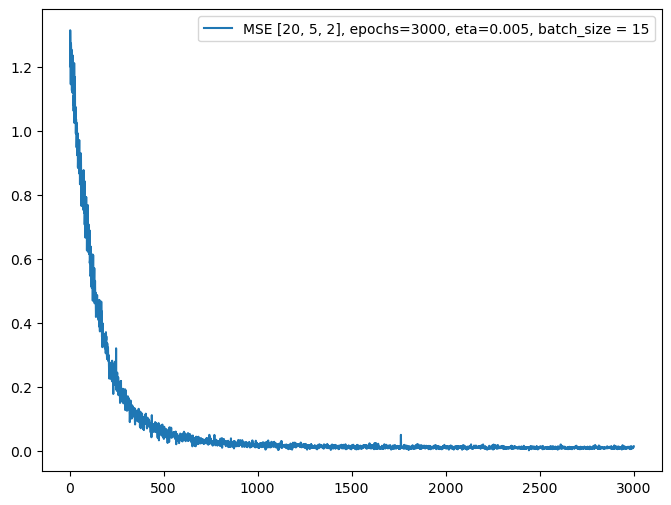

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(2, len(MSE_list_SB)), MSE_list_SB[2:len(MSE_list_SB)], label=f'MSE {n_hidden}, epochs={epochs}, eta={eta}, batch_size = {batch_size}')
plt.legend()
plt.show()

# Модифицируем для задачи классификации

## Cross-entropy loss function and logistic regression 

The probability of the output <math>y=1</math> is given by
$$q_{y=1} = \hat{y} \equiv g(\mathbf{w}\cdot\mathbf{x}) = \frac 1 {1+e^{-\mathbf{w}\cdot\mathbf{x}}},$$
where the vector of weights <math>\mathbf{w}</math> is optimized through some appropriate algorithm such as [[gradient descent]]. Similarly, the complementary probability of finding the output <math>y=0</math> is simply given by
$$q_{y=0} = 1-\hat{y}$$

Having set up our notation, $p\in\{y,1-y\}$ and $q\in\{\hat{y},1-\hat{y}\}$, we can use cross-entropy to get a measure of dissimilarity between <math>p</math> and <math>q</math>:
$$H(p,q)\ =\ -\sum_i p_i\log q_i\ =\ -y\log\hat{y} - (1-y)\log(1-\hat{y})$$

Logistic regression typically optimizes the log loss for all the observations on which it is trained, which is the same as optimizing the average cross-entropy in the sample. For example, suppose we have <math>N</math> samples with each sample indexed by $n=1,\dots,N$. The ''average'' of the loss function is then given by:

$$\begin{align}
    J(\mathbf{w})\ &=\ \frac1N\sum_{n=1}^N H(p_n,q_n)\ =\ -\frac1N\sum_{n=1}^N\ \bigg[y_n  \log \hat y_n + (1 - y_n)  \log (1 - \hat y_n)\bigg]\,,
\end{align}$$

where $\hat{y}_n\equiv g(\mathbf{w}\cdot\mathbf{x}_n) = 1/(1+e^{-\mathbf{w}\cdot\mathbf{x}_n}) $, with $g(z)$ the logistic function as before.

'''Remark:''' The gradient of the cross-entropy loss for logistic regression is the same as the gradient of the squared error loss for [[linear regression]]. That is, define

$$X^T=\begin{pmatrix}
1&x_{11}&\dots&x_{1p}\\ 
1&x_{21}&\cdots&x_{2p}\\ 
\vdots & \vdots && \vdots \\
1&x_{n1}&\cdots&x_{np}\\ 
\end{pmatrix}\in \mathbb{R}^{n\times(p+1)}$$
$$\hat{y_i} = \hat{f}(x_{i1},\dots,x_{ip}) = \frac{1}{1+\exp(-\beta_0-\beta_1x_{i1}-\dots-\beta_px_{ip})}$$
$$L(\overrightarrow{\beta})=-\sum_{i=1}^N [y^i\log \hat{y}^i+(1-y^i)\log(1-\hat{y}^i)]$$

Then we have the result 

$$\frac{\partial}{\partial\overrightarrow{\beta}}L(\overrightarrow{\beta})=X^T(\hat{Y}-Y)$$


In [13]:
y_pred_lists = NN_dis_SB_sgd[0]

In [21]:
len(y_pred_lists) #равно числу эпох

3001

In [27]:
len(y_pred_lists[555]) #число скрытых слоёв+1

4

In [29]:
len(y_pred_lists[555][-1]) #вероятности для батча

15

In [34]:
y_pred_lists[555][-1]

[(0.8606604573188482,),
 (0.8605728833991974,),
 (0.860512178813288,),
 (0.8604731601697146,),
 (0.860619169384352,),
 (0.860776900093749,),
 (0.8605157224218868,),
 (0.8605852631499843,),
 (0.8604280997144411,),
 (0.8604716198453995,),
 (0.8605215949394955,),
 (0.8606200911749083,),
 (0.8607575504601415,),
 (0.8606276142050772,),
 (0.860347776439648,)]

In [37]:
log(y_pred_lists[555][-1][6][0])

-0.15022339223437295

In [64]:
-sum([(y_pred_lists[555][-1][i][0]*log(y_pred_lists[555][-1][i][0]+
                                     (1-y_pred_lists[555][-1][i][0])*log(1-y_pred_lists[555][-1][i][0])))
      for i in range(len(y_pred_lists[555][-1]))])/len(y_pred_lists[555][-1])

0.8595139189814986

In [5]:
from math import log
def BCE(y_pred_lists):
    bce_list = []
    for loss in range(len(y_pred_lists)):
        bce_epoch = -sum([(y_pred_lists[loss][-1][i][0]*log(y_pred_lists[loss][-1][i][0]+
                                     (1-y_pred_lists[loss][-1][i][0])*log(1-y_pred_lists[loss][-1][i][0])))
      for i in range(len(y_pred_lists[loss][-1]))])/len(y_pred_lists[loss][-1])
        bce_list.append(bce_epoch)
    return bce_list



In [ ]:
BCE_list_SB = BCE(y_pred_lists)

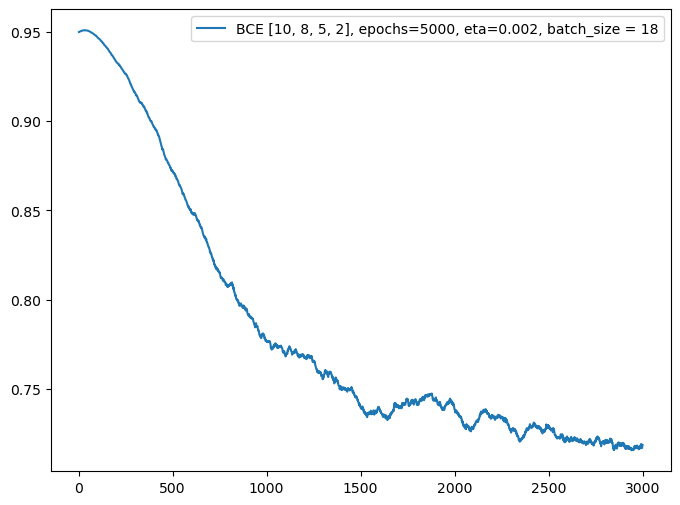

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(2, len(BCE_list_SB)), BCE_list_SB[2:len(BCE_list_SB)], label=f'BCE {n_hidden}, epochs={epochs}, eta={eta}, batch_size = {batch_size}')
plt.legend()
plt.show()

# Протестируем нашу нейронную сеть на датасете с титаником

In [2]:
import pandas as pd
import numpy as np
data_tit = pd.read_csv('titanic_processed_train.csv')
data_tit

,target,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked__C,Embarked__Q,Embarked__S
0,0.0,1.0,0.0,0.271174,0.125,0.000000,0.102956,0.014151,0.0,0.0,1.0
1,1.0,0.0,1.0,0.472229,0.125,0.000000,0.036471,0.139136,1.0,0.0,0.0
2,1.0,1.0,1.0,0.321438,0.000,0.000000,0.097286,0.015469,0.0,0.0,1.0
3,1.0,0.0,1.0,0.434531,0.125,0.000000,0.036480,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.0,0.434531,0.000,0.000000,0.120221,0.015713,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.334004,0.000,0.000000,0.068001,0.025374,0.0,0.0,1.0
887,1.0,0.0,1.0,0.233476,0.000,0.000000,0.035916,0.058556,0.0,0.0,1.0
888,0.0,1.0,1.0,0.183508,0.125,0.333333,0.097286,0.045771,0.0,0.0,1.0
889,1.0,0.0,0.0,0.321438,0.000,0.000000,0.035695,0.058556,1.0,0.0,0.0


In [3]:
col_tit_list = list(data_tit.columns)
lists = []
for k in np.arange(len(col_tit_list)):
    list_k = list(data_tit[f'{col_tit_list[k]}'])
    lists.append(list_k)

In [4]:
X_tit, Y_tit = list(zip(*lists[1:len(lists)])), [[lists[-1][i]] for i in range(len(lists[1]))]

In [105]:
n_hidden = [4, 6, 8, 5, 2]
epochs = 10000
eta = 0.001
batch_size = 10

In [106]:
%%time
NN_tit = Neural_Network.SGD(X_tit, Y_tit, batch_size, n_hidden, epochs, eta)

CPU times: total: 25.7 s
Wall time: 25.8 s


In [107]:
y_pred_lists_tit = NN_tit[0]
BCE_list_tit = BCE(y_pred_lists_tit)

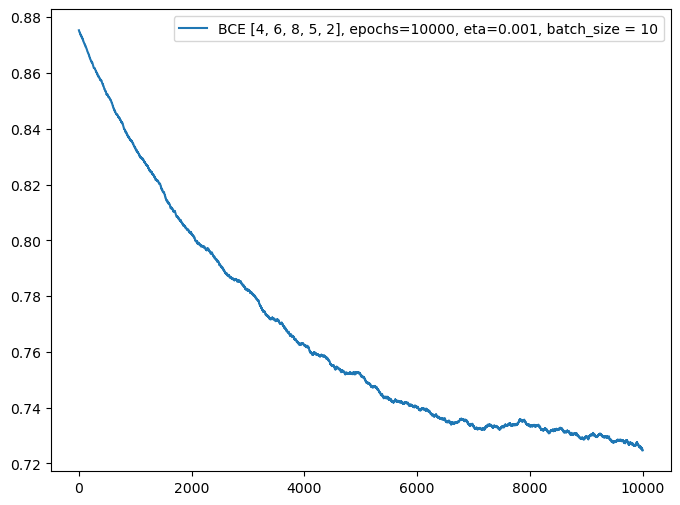

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(2, len(BCE_list_tit)), BCE_list_tit[2:len(BCE_list_tit)], label=f'BCE {n_hidden}, epochs={epochs}, eta={eta}, batch_size = {batch_size}')
plt.legend()
plt.show()

# Перепишем  класс в терминах ООП

In [16]:
class Neural_Network(object):
    def __init__(self, batch_size, n_hidden, eta, epochs): 
        self.batch_size = batch_size
        self.n_hidden = n_hidden
        self.eta = eta
        self.epochs = epochs
        
    @staticmethod
    def norm_matrix(matrix):

        matrix_transpose = list(zip(*matrix))

        matrix_empty = []
        for m in range(len(matrix_transpose)):
            normed_row = [abs(list(zip(*matrix))[m][x])/max(list(zip(*matrix))[m]) for x in range(len(list(zip(*matrix))[m]))]
            matrix_empty.append(normed_row)

        normed_matrix = list(zip(*matrix_empty))

        return normed_matrix
        
    
    @staticmethod
    def random_number():
        import datetime    
        my_dt_ob = datetime.datetime.now()
        date_list = [my_dt_ob.year, my_dt_ob.month, my_dt_ob.day, my_dt_ob.hour, my_dt_ob.minute, my_dt_ob.second, my_dt_ob.microsecond]     
        dt_random_num = date_list[6]**(1/(date_list[5]+0.0001))*date_list[4]
        return dt_random_num  
    
    @staticmethod
    def random_list_generator(list_len):
        my_random_list = []
        for i in range(list_len):
            my_random_list_i = (i+1)*(Neural_Network.random_number()*(i+1)-i*2)
            my_random_list.append(my_random_list_i-round(my_random_list_i))
        return my_random_list
   
    @staticmethod
    def random_matrix_generator(rows_len, cols_len):
        my_random_chain = Neural_Network.random_list_generator(rows_len * cols_len)   
        nev = [my_random_chain[i:i+cols_len] for i in range(0,len(my_random_chain), cols_len)]
        return nev

    @staticmethod
    def sigmoid(z):
        from math import exp
        # exp = 2.71828182845904523536028747135266249775724709369995
        try:
          res =  1. / (1. + exp(-z))#1/(1+exp(-z))
        except OverflowError:
          res = float('inf')
        return res
    
    @staticmethod
    def sigmoid_prime(z):
        from math import exp
        # exp = 2.71828182845904523536028747135266249775724709369995
        try:
          res =  exp(-z) / (1. + exp(-z))**2 #exp(-z)/((1+exp(-z))**2)
        except OverflowError:
          res = float('inf')
        return res
        # return exp(-z)/((1+exp(-z))**2)

    @staticmethod
    def matrix_multiple(a, b):
        zip_b = zip(*b)
        zip_b = list(zip_b)
        return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b)) 
                 for col_b in zip_b] for row_a in a]
    
    @staticmethod
    def matrix_diff(matrix1, matrix2):   
        empty_chain = [None]*len(matrix1)*len(matrix1[0])
        matrix_diff = [empty_chain[i:i+len(matrix1[0])] for i in range(0, len(empty_chain), len(matrix1[0]))]
        for ii in range(len(matrix1)):
            for jj in range(len(matrix1[0])):
                matrix_diff[ii][jj] = matrix1[ii][jj] - matrix2[ii][jj]
        return matrix_diff
    
    @staticmethod
    def num_matrix(n, matrix):
        return [list(map(lambda x: x*n, z)) for z in matrix]
    
    @staticmethod
    def get_batch(matrix_X, matrix_Y, batch_size):
        index_list = [int(abs(Neural_Network.random_list_generator(batch_size)[q])*len(matrix_X)) for q in range(batch_size)]
        batch_X, batch_Y = [], []
        for ind in range(len(index_list)):
            batch_X_row = matrix_X[index_list[ind]]
            batch_X.append(batch_X_row)
            batch_Y_row = matrix_Y[index_list[ind]]
            batch_Y.append(batch_Y_row)
        return batch_X, batch_Y, index_list
    
    
    def initial_weights_matrix_generator(self, matrix_X, matrix_Y):
        w_rows_list = [len(matrix_X[0])] + self.n_hidden
        w_cols_list = self.n_hidden +[len(matrix_Y[0])]
        w_dim_list = list(zip(w_rows_list, w_cols_list))
        self.initial_weights_matrix_list = []
        for iw in range(len(w_dim_list)):
            W_i = Neural_Network.random_matrix_generator(w_dim_list[iw][0], w_dim_list[iw][1])
            self.initial_weights_matrix_list.append(W_i)
        return self.initial_weights_matrix_list
      
    
    def z_a_list_func(self, X_, weights):
        z_initial = Neural_Network.matrix_multiple(X_, weights[0])
        a_initial =  [*zip(*[[Neural_Network.sigmoid(z_initial[i][j]) for i in range(len(z_initial))] for j in range(len(z_initial[0]))])]

        self.z_list = []
        self.z_list.append(z_initial)

        self.a_list = []
        self.a_list.append(a_initial)

        for g in range(len(self.n_hidden)):
            z_g = Neural_Network.matrix_multiple(self.a_list[g], weights[g+1])
            self.z_list.append(z_g)
            a_g = [*zip(*[[Neural_Network.sigmoid(self.z_list[g+1][a][b]) for a in range(len(self.z_list[g+1]))] for b in range(len(self.z_list[g+1][0]))])]
            self.a_list.append(a_g)
        return self.z_list, self.a_list
    
       
    def prime(self, z_list_):
        self.prime_list = []
        for p in range(len(self.n_hidden)+1):
            prime_list_p = [*zip(*[[Neural_Network.sigmoid_prime(z_list_[p][i][j]) for i in range(len(z_list_[p]))] for j in range(len(z_list_[p][0]))])]
            self.prime_list.append(prime_list_p)
        return self.prime_list
    
    
    def discrepansy(self, Y_, a_list_):
        self.discrepansy_list = []
        for yy in range(len(Y_)):
            dis_i = Y_[yy][0] - a_list_[-1][yy][0] #Neural_Network.matrix_diff(Y[yy], a_list_[-1][yy])  #
            self.discrepansy_list.append(dis_i)
        self.discrepansy_list = [self.discrepansy_list[i:i+len(Y_[0])] for i in range(0,len(Y_), len(Y_[0]))]
        return self.discrepansy_list
    
        
    def delta(self, Y_delta, weights_delta, discrepansy_, prime_):
        delta_last = [[discrepansy_[qi][0]*prime_[-1][qi][0] for qi in range(len(Y_delta))][iq:iq+len(Y_delta[0])] for iq in range(0,len(Y_delta), len(Y_delta[0]))] 
        self.delta_list = []
        self.delta_list.append(delta_last)
        for d in range(len(self.n_hidden)):
            delta_i = Neural_Network.matrix_multiple(self.delta_list[0], Neural_Network.matrix_multiple([*zip(*weights_delta[-d-1])], prime_[-d-2]))
            self.delta_list.insert(0, delta_i)
        return self.delta_list
    
      
    def dEdW(self, X_de, a_list_, delta_):
        self.dEdW_list = []
        corr_list = [X_de]+a_list_[0:len(a_list_)-1]
        for e in range(len(self.n_hidden)+1):
            dEdW_e = Neural_Network.matrix_multiple([*zip(*corr_list[e])], delta_[e])
            self.dEdW_list.append(dEdW_e)
        return self.dEdW_list
    
      
    def weights_update(self, weights_u, dEdW_f):
        self.w_updated_matrix = []
        for n in range(len(self.n_hidden)+1):
            w_updated_n = Neural_Network.matrix_diff(weights_u[n], Neural_Network.num_matrix(-self.eta, dEdW_f[n]))
            self.w_updated_matrix.append(w_updated_n)
        return  self.w_updated_matrix
    
    
    def SGD(self, X_c, Y_c):
        
        X_normed = Neural_Network.norm_matrix(X_c)
        Y_normed = Neural_Network.norm_matrix(Y_c)
        
        X_initial_batch, Y_initial_batch, index_lists_initial = Neural_Network.get_batch(X_normed, Y_normed, self.batch_size)
        
        w_list_total = []
        a_list_total= []
        z_list_total= []
        prime_list_total = []
        discrepansy_list_total = []
        delta_list_total = []
        dEdW_list_total = []
        index_lists_total = []

        #База индукции
        w_0 = self.initial_weights_matrix_generator(X_initial_batch, Y_initial_batch)
        z_0, a_0 = self.z_a_list_func(X_initial_batch, w_0)
        p_0 = self.prime(z_0)
        dis_0 = self.discrepansy(Y_initial_batch, a_0)
        del_0 = self.delta(Y_initial_batch, w_0, dis_0, p_0)
        dEdW_0 = self.dEdW(X_initial_batch, a_0, del_0)


        w_list_total.append(w_0)
        a_list_total.append(a_0)
        z_list_total.append(z_0)
        prime_list_total.append(p_0)
        discrepansy_list_total.append(dis_0)
        delta_list_total.append(del_0)
        dEdW_list_total.append(dEdW_0)
        index_lists_total.append(index_lists_initial)
        
        for epoch in range(epochs):
            
            X_epoch_batch, Y_epoch_batch, index_lists_epoch = Neural_Network.get_batch(X_normed, Y_normed, self.batch_size)
            index_lists_total.append(index_lists_epoch)
            
            z_a_list_epoch = self.z_a_list_func(X_epoch_batch, w_list_total[epoch])
            a_list_total.append(z_a_list_epoch[1])
            z_list_total.append(z_a_list_epoch[0])

            prime_epoch = self.prime(z_list_total[epoch])
            prime_list_total.append(prime_epoch)

            discrepansy_epoch = self.discrepansy(Y_epoch_batch, a_list_total[epoch])
            discrepansy_list_total.append(discrepansy_epoch)

            delta_epoch = self.delta(Y_epoch_batch, w_list_total[epoch], discrepansy_list_total[epoch], prime_list_total[epoch])
            delta_list_total.append(delta_epoch)

            dEdW_epoch = self.dEdW(X_epoch_batch, a_list_total[epoch], delta_list_total[epoch])
            dEdW_list_total.append(dEdW_epoch)

            w_epoch = self.weights_update(w_list_total[epoch], dEdW_list_total[epoch])
            w_list_total.append(w_epoch)

        return a_list_total, z_list_total, prime_list_total, discrepansy_list_total, delta_list_total, dEdW_list_total, w_list_total, index_lists_total
    

In [77]:
n_hidden = [6, 14, 10, 5]
epochs = 5000
eta = 0.007
batch_size = 10

In [78]:
NN_OOP = Neural_Network(batch_size, n_hidden, eta, epochs)

In [79]:
%%time
NN_OOP_tit = NN_OOP.SGD(X_tit, Y_tit)

CPU times: total: 20.4 s
Wall time: 20.5 s


In [83]:
y_pred_lists_tit_OOP = NN_OOP_tit[0]
BCE_list_tit_OOP = BCE(y_pred_lists_tit_OOP)

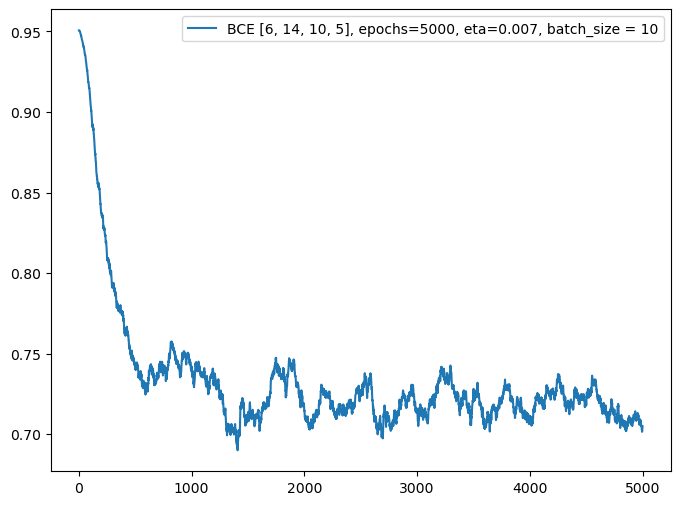

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(len(BCE_list_tit_OOP)), BCE_list_tit_OOP, label=f'BCE {n_hidden}, epochs={epochs}, eta={eta}, batch_size = {batch_size}')
plt.legend()
plt.show()

Результат последнего батча:

In [82]:
result_last = NN_OOP_tit[0][54][-1]
result_last

[(0.5050417826137132,),
 (0.5048859570276817,),
 (0.5050925893126984,),
 (0.5050008853330655,),
 (0.5050024390697903,),
 (0.5049361327731016,),
 (0.5048427442902652,),
 (0.5049578925121458,),
 (0.50504077584948,),
 (0.5050921543405893,)]

Использованные индексы в последнем батче:

In [64]:
index_last = NN_OOP_tit[-1][-1]
index_last 

[48, 191, 430, 124, 306, 58, 326, 391, 314, 333, 443, 232, 73, 415, 81]

Сопоставим эти индескы с исходным Y:

In [65]:
epoched_tit = []
for ep in range(len(index_last)):
    Y_tit_ep = Y_tit[index_last[ep]][0]
    epoched_tit.append(Y_tit_ep )

In [66]:
epoched_tit

[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]